In [3]:
import pandas as pd
import numpy as np

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns






%run ../all_studies/us_common_functions.ipynb





######################################################################################################
# Ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
######################################################################################################
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))
# %autosave 0
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', 2000)
# pd.set_option('display.width', 2000)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# #size=25
# size=15
# params = {'legend.fontsize': 'large',
#           'figure.figsize': (20,8),
#           'axes.labelsize': size,
#           'axes.titlesize': size,
#           'xtick.labelsize': size*0.75,
#           'ytick.labelsize': size*0.75,
#           'axes.titlepad': 25}
# plt.rcParams.update(params)
######################################################################################################




# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay




#########################################
window_size=10
overlappping_window=False
#########################################




data_dir = '../../data/sim1/'
figure_dir = '../../figure/sim1/'






In [4]:
df = pd.read_csv(data_dir + "data_2.csv")
# df = pd.read_csv(data_dir + "data_2.csv").iloc[:10000,]
df.head()

,Time,Speed,Acceleration,Steering,Lane.Position,Breathing,Heart,Palm,Perinasal,Distraction,Drive,Subject,Drive_Label,Gender,Age,STAI,Type_AB,Effort,Frustration,Mental Demand,Performance,Physical Demand,Temporal Demand,NASA Total Sum,NASA Total Sum - Normalized,Effort - Normalized,Frustration - Normalized,Mental Demand - Normalized,Performance - Normalized,Physical Demand - Normalized,Temporal Demand - Normalized,Nasa_Cluster
0,1,-0.011065,0.0,0.006903,1.729902,NaN,NaN,NaN,NaN,0,0,2,RD,Female,23,40,97,10.0,6.0,16.0,4.0,9.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
1,2,0.021781,0.0,0.006903,1.729901,NaN,NaN,NaN,NaN,0,0,2,RD,Female,23,40,97,10.0,6.0,16.0,4.0,9.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
2,3,0.399804,0.0,0.005456,1.729878,NaN,NaN,NaN,NaN,0,0,2,RD,Female,23,40,97,10.0,6.0,16.0,4.0,9.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
3,4,0.497087,0.0,-0.020297,1.729929,NaN,NaN,NaN,NaN,0,0,2,RD,Female,23,40,97,10.0,6.0,16.0,4.0,9.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
4,5,0.495071,0.0,-0.026979,1.730128,15.96,82.8,76.136564,0.005924,0,0,2,RD,Female,23,40,97,10.0,6.0,16.0,4.0,9.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High


In [5]:
df.columns

Index(['Time', 'Speed', 'Acceleration', 'Steering', 'Lane.Position',
       'Breathing', 'Heart', 'Palm', 'Perinasal', 'Distraction', 'Drive',
       'Subject', 'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'NASA Total Sum - Normalized',
       'Effort - Normalized', 'Frustration - Normalized',
       'Mental Demand - Normalized', 'Performance - Normalized',
       'Physical Demand - Normalized', 'Temporal Demand - Normalized',
       'Nasa_Cluster'],
      dtype='object')

In [6]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
print(df.Subject.unique())

Total Subjects: 31
[ 2  3  5  8 14 16 17 18 20 23 24 25 29 31 33 36 38 39 43 44 45 47 60 61
 62 66 77 79 80 81 84]


# Creating csv for additional plots for paper -->

In [7]:
df['Treatment'] = df['Drive_Label']
df['TimeElapsed'] = df.groupby(['Subject', 'Treatment']).cumcount()+1
df.to_csv(data_dir + "data_2.1.csv", sep=',', index=False)


plot_df = df.copy()




plot_df['Perinasal_Log'] = np.log(plot_df['Perinasal'])


def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(plot_df.shape)
plot_df = quality_control_phase1(plot_df, 'Heart', 40, 140)
plot_df = quality_control_phase1(plot_df, 'Breathing', 4, 40)
print(plot_df.shape)


plot_df.to_csv(data_dir + "data_2.2.csv", sep=',', index=False)

(103325, 35)
(102729, 35)


In [8]:
print(df.Treatment.unique())
df = df[df['Treatment'].isin(['RD', 'CD', 'MD', 'ED'])]
print(df.Treatment.unique())

['RD' 'ND' 'CD' 'MD' 'ED']
['RD' 'CD' 'MD' 'ED']


In [9]:
df.isnull().sum()

Time                              0
Speed                             0
Acceleration                      0
Steering                          0
Lane.Position                     0
Breathing                       476
Heart                           476
Palm                            476
Perinasal                       476
Distraction                       0
Drive                             0
Subject                           0
Drive_Label                       0
Gender                            0
Age                               0
STAI                              0
Type_AB                           0
Effort                            0
Frustration                       0
Mental Demand                     0
Performance                       0
Physical Demand                   0
Temporal Demand                   0
NASA Total Sum                    0
NASA Total Sum - Normalized       0
Effort - Normalized               0
Frustration - Normalized          0
Mental Demand - Normalized  

In [10]:
df.drop('Palm', axis=1, inplace=True)
df.isnull().sum()

Time                              0
Speed                             0
Acceleration                      0
Steering                          0
Lane.Position                     0
Breathing                       476
Heart                           476
Perinasal                       476
Distraction                       0
Drive                             0
Subject                           0
Drive_Label                       0
Gender                            0
Age                               0
STAI                              0
Type_AB                           0
Effort                            0
Frustration                       0
Mental Demand                     0
Performance                       0
Physical Demand                   0
Temporal Demand                   0
NASA Total Sum                    0
NASA Total Sum - Normalized       0
Effort - Normalized               0
Frustration - Normalized          0
Mental Demand - Normalized        0
Performance - Normalized    

In [11]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(81632, 33)
(81156, 33)


In [12]:
df.isnull().sum()

Time                            0
Speed                           0
Acceleration                    0
Steering                        0
Lane.Position                   0
Breathing                       0
Heart                           0
Perinasal                       0
Distraction                     0
Drive                           0
Subject                         0
Drive_Label                     0
Gender                          0
Age                             0
STAI                            0
Type_AB                         0
Effort                          0
Frustration                     0
Mental Demand                   0
Performance                     0
Physical Demand                 0
Temporal Demand                 0
NASA Total Sum                  0
NASA Total Sum - Normalized     0
Effort - Normalized             0
Frustration - Normalized        0
Mental Demand - Normalized      0
Performance - Normalized        0
Physical Demand - Normalized    0
Temporal Deman

In [13]:
def get_range(df, col):
    return [df[col].min(), df[col].max()]

print(get_range(df, 'Perinasal'))
print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))

[0.0028168286770648, 0.0487875758404178]
[50.0, 117.2]
[4.520000000000009, 34.84]


In [14]:
df['Perinasal_Log'] = np.log(df['Perinasal'])

In [15]:
df.groupby(['Subject'])['Treatment'].agg(['nunique','min','max','count'])

,nunique,min,max,count
Subject,,,,
2,4,CD,RD,2781
3,4,CD,RD,2828
5,4,CD,RD,2890
8,4,CD,RD,2804
14,4,CD,RD,2867
16,4,CD,RD,2795
17,4,CD,RD,2726
18,4,CD,RD,2866
20,4,CD,RD,2836


In [16]:
def get_mean(df, col_name):
    return df.groupby(['Subject', 'Drive'])[col_name].transform('mean')

def get_baseline_mean(df, col_name):
    return df[col_name].iloc[0]

In [17]:
df['PP_Mean'] = get_mean(df, 'Perinasal_Log')
df['HR_Mean'] = get_mean(df, 'Heart')
df['BR_Mean'] = get_mean(df, 'Breathing')

In [18]:
grouped_df = df.groupby(['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean'], as_index = False)['Time'].count()
rb_df = grouped_df[(grouped_df.Treatment == 'RD')][['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean']]
rb_df.rename(columns = {
            'PP_Mean': 'PP_RB_Mean',
            'HR_Mean': 'HR_RB_Mean',
            'BR_Mean': 'BR_RB_Mean',}, inplace=True)
rb_df.to_csv(data_dir + 'rb_data.csv', sep=',')

In [19]:
df_arousal = pd.DataFrame()

for subj in df['Subject'].unique():
    subj_df = df.copy()[df.Subject == subj]
    rd_df = subj_df.copy()[subj_df.Treatment == 'RD']
    
    if rd_df.shape[0]:  # If there is any row for Relaxing Drive
        subj_df['PP_Normalized'] = subj_df.Perinasal_Log - get_baseline_mean(rd_df, 'PP_Mean')
        subj_df['HR_Normalized'] = subj_df.Heart - get_baseline_mean(rd_df, 'HR_Mean')
        subj_df['BR_Normalized'] = subj_df.Breathing - get_baseline_mean(rd_df, 'BR_Mean')

        df_arousal = df_arousal.append(subj_df)
    
df_arousal.columns

Index(['Time', 'Speed', 'Acceleration', 'Steering', 'Lane.Position',
       'Breathing', 'Heart', 'Perinasal', 'Distraction', 'Drive', 'Subject',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'NASA Total Sum - Normalized',
       'Effort - Normalized', 'Frustration - Normalized',
       'Mental Demand - Normalized', 'Performance - Normalized',
       'Physical Demand - Normalized', 'Temporal Demand - Normalized',
       'Nasa_Cluster', 'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean',
       'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized',
       'BR_Normalized'],
      dtype='object')

In [20]:
print_row_count(df_arousal, 'Drive')

print(df_arousal.shape)
df_arousal = df_arousal.dropna()
print(df_arousal.shape)

print_row_count(df_arousal, 'Drive')

df_arousal.to_csv(data_dir + "data_2.3.csv", sep=',')
print(df_arousal.columns)

       Drive
Drive       
0      17482
2      20836
3      21127
4      21711 

(81156, 40)
(81156, 40)
       Drive
Drive       
0      17482
2      20836
3      21127
4      21711 

Index(['Time', 'Speed', 'Acceleration', 'Steering', 'Lane.Position',
       'Breathing', 'Heart', 'Perinasal', 'Distraction', 'Drive', 'Subject',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'NASA Total Sum - Normalized',
       'Effort - Normalized', 'Frustration - Normalized',
       'Mental Demand - Normalized', 'Performance - Normalized',
       'Physical Demand - Normalized', 'Temporal Demand - Normalized',
       'Nasa_Cluster', 'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean',
       'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized',
       'BR_Normalized'],
      dtype='object')


In [21]:
print_row_count(df_arousal, 'Drive')

print(df_arousal.shape, df_arousal.Treatment.unique())
df_arousal = df_arousal[~df_arousal.Treatment.isin(['RD', 'ND'])]
print(df_arousal.shape, df_arousal.Treatment.unique())

print_row_count(df_arousal, 'Drive')

       Drive
Drive       
0      17482
2      20836
3      21127
4      21711 

(81156, 40) ['RD' 'CD' 'MD' 'ED']
(63674, 40) ['CD' 'MD' 'ED']
       Drive
Drive       
2      20836
3      21127
4      21711 



In [22]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
unique_subjs = df.Subject.unique()
print(unique_subjs)
print('\n')


print('After removing subjects without Relaxing Drive, Total Subjects: ' + str(len(df_arousal.Subject.unique())))
unique_subjs = df_arousal.Subject.unique()
print(unique_subjs)

Total Subjects: 31
[ 2  3  5  8 14 16 17 18 20 23 24 25 29 31 33 36 38 39 43 44 45 47 60 61
 62 66 77 79 80 81 84]


After removing subjects without Relaxing Drive, Total Subjects: 31
[ 2  3  5  8 14 16 17 18 20 23 24 25 29 31 33 36 38 39 43 44 45 47 60 61
 62 66 77 79 80 81 84]


# --- Point to note ---

### OSF --> Total subjs 68
### After removing subjs without RD --> Total subjs 35

In [23]:
def get_mean(df, col_name):
    return df[col_name].mean() 

def get_sd(df, col_name):
    return stdev(df[col_name])

def convert_str(num):
    return(str(round(num, 2)))

def print_mean_sd_stress_marker(signal, mean, sd, stress_marker): 
    print(signal + ":\t" + convert_str(mean) + u" \u00B1 " + convert_str(sd) 
          + "\tstress_marker: " + convert_str(stress_marker))


In [24]:
############################################################################################
pp_diff_mean = get_mean(df_arousal, 'PP_Normalized')
pp_diff_sd = get_sd(df_arousal, 'PP_Normalized')

pp_stress_marker = pp_diff_mean + 0.5*pp_diff_sd

df_arousal.loc[df_arousal.PP_Normalized < pp_stress_marker, 'PP_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_stress_marker, 'PP_Arousal'] = 'stressed'
############################################################################################



############################################################################################
pp_2_stress_marker = pp_diff_mean

df_arousal.loc[df_arousal.PP_Normalized < pp_2_stress_marker, 'PP_Arousal_2'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_2_stress_marker, 'PP_Arousal_2'] = 'stressed'
############################################################################################




############################################################################################
hr_diff_mean = get_mean(df_arousal, 'HR_Normalized')
hr_diff_sd = get_sd(df_arousal, 'HR_Normalized')

hr_stress_marker = 0

df_arousal.loc[df_arousal.HR_Normalized < hr_stress_marker, 'HR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.HR_Normalized >= hr_stress_marker, 'HR_Arousal'] = 'stressed'
############################################################################################




############################################################################################
br_diff_mean = get_mean(df_arousal, 'BR_Normalized')
br_diff_sd = get_sd(df_arousal, 'BR_Normalized')

br_stress_marker = 0

df_arousal.loc[df_arousal.BR_Normalized < br_stress_marker, 'BR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.BR_Normalized >= br_stress_marker, 'BR_Arousal'] = 'stressed'
############################################################################################

    
    
############################################################################################
print_mean_sd_stress_marker('PP', pp_diff_mean, pp_diff_sd, pp_stress_marker)
print_mean_sd_stress_marker('PP_2', pp_diff_mean, pp_diff_sd, pp_2_stress_marker)
print_mean_sd_stress_marker('HR', hr_diff_mean, hr_diff_sd, hr_stress_marker)
print_mean_sd_stress_marker('BR', br_diff_mean, br_diff_sd, br_stress_marker)
############################################################################################

# ############################################################################################
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_stress_marker, 2))
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_2_stress_marker, 2))
# print(round(hr_diff_mean, 2), round(hr_diff_sd, 2), round(hr_stress_marker, 2))
# print(round(br_diff_mean, 2), round(br_diff_sd, 2), round(br_stress_marker, 2))
# ############################################################################################



# 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'

PP:	0.08 ± 0.16	stress_marker: 0.16
PP_2:	0.08 ± 0.16	stress_marker: 0.08
HR:	-0.21 ± 5.14	stress_marker: 0
BR:	-0.59 ± 3.69	stress_marker: 0


In [25]:
line_width = 2
palette = {"relaxed": "lightgreen", "stressed": "red"}

params = {
    'figure.figsize': (20,8),
    'axes.titlesize': 36,
    'legend.fontsize': 'large',
    'axes.labelsize': 30,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'axes.titlepad': 25}

plt.rcParams.update(params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


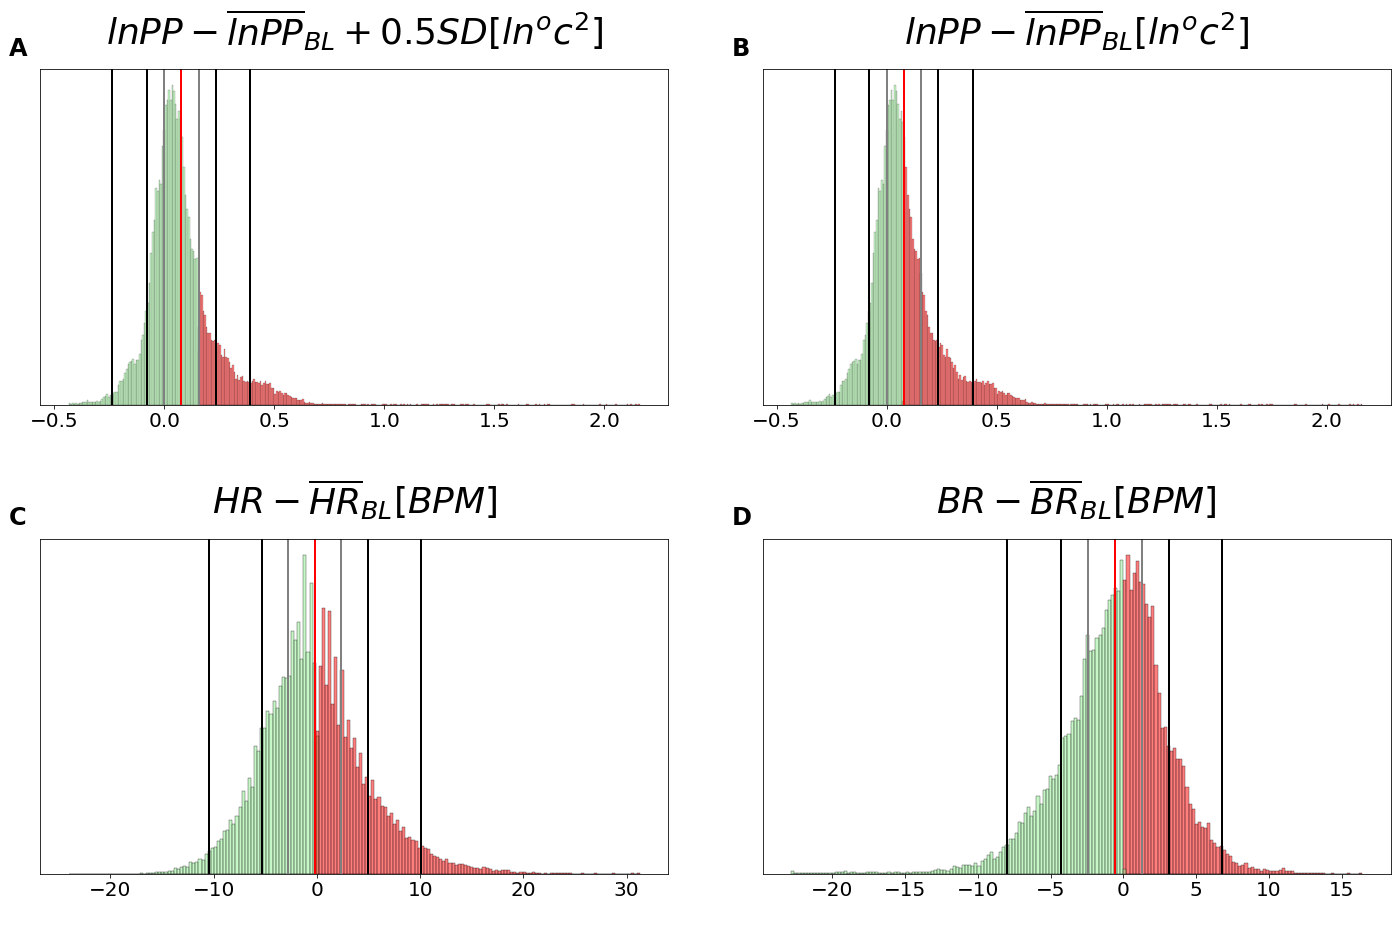

In [26]:
fig = plt.figure()


# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C', 'D')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    generate_arousal_extraction_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(figure_dir + 'sim1_pp_br_hr_arousal_extraction.pdf', dpi=300, bbox_inches='tight')
plt.show()

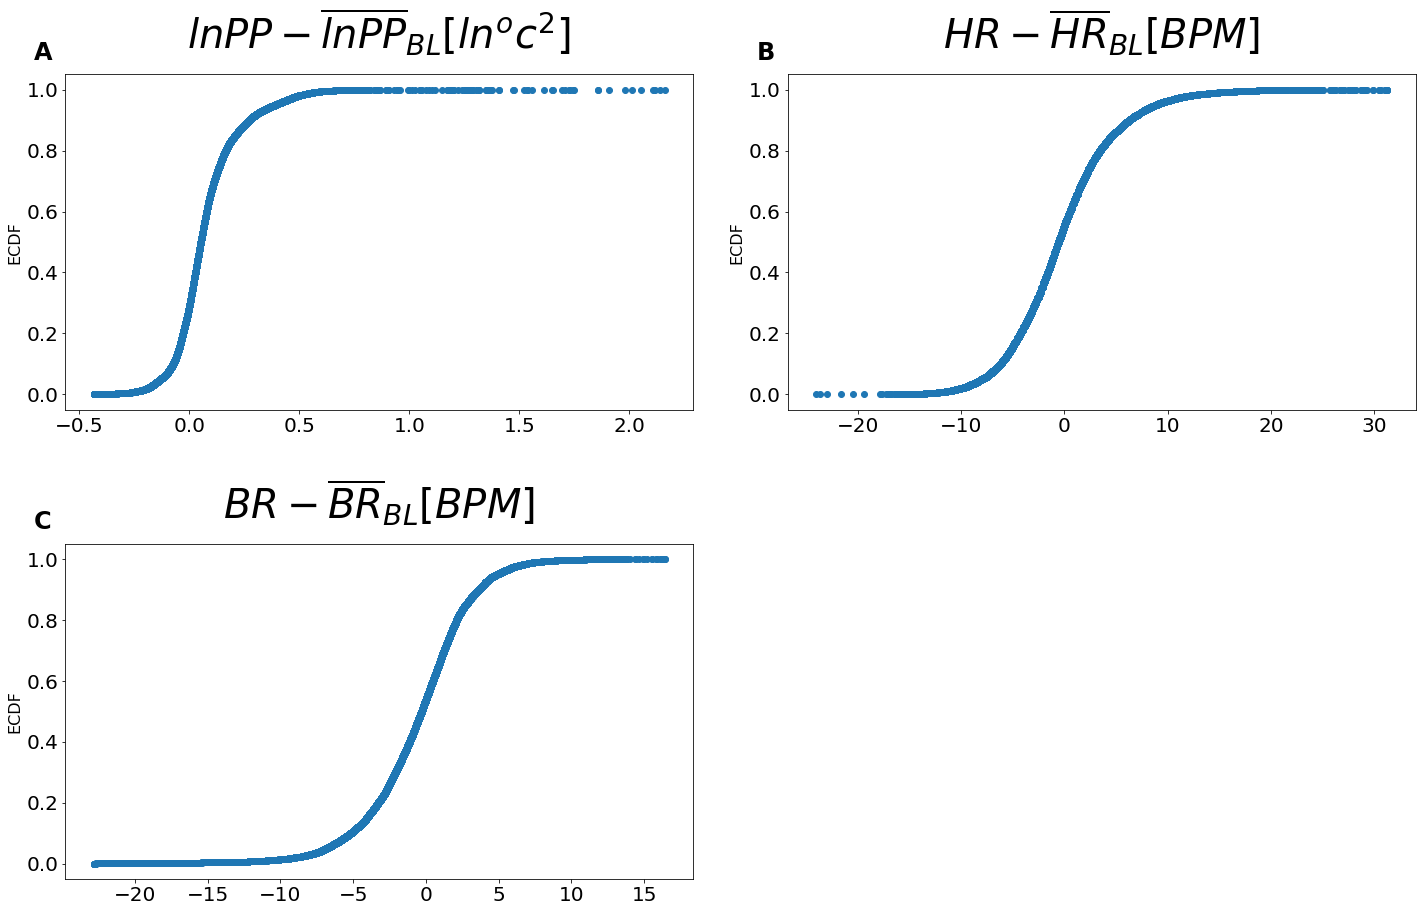

In [27]:
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    df_arousal = generate_ecdf_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(figure_dir + 'sim1_pp_br_hr_ecdf.png', dpi=300, bbox_inches='tight')
fig.savefig(figure_dir + 'sim1_pp_br_hr_ecdf.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
df_arousal.columns

Index(['Time', 'Speed', 'Acceleration', 'Steering', 'Lane.Position',
       'Breathing', 'Heart', 'Perinasal', 'Distraction', 'Drive', 'Subject',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'NASA Total Sum - Normalized',
       'Effort - Normalized', 'Frustration - Normalized',
       'Mental Demand - Normalized', 'Performance - Normalized',
       'Physical Demand - Normalized', 'Temporal Demand - Normalized',
       'Nasa_Cluster', 'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean',
       'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized',
       'PP_Arousal', 'PP_Arousal_2', 'HR_Arousal', 'BR_Arousal', 'PP_ecdf',
       'HR_ecdf', 'BR_ecdf'],
      dtype='object')

In [29]:
signals = ['PP', 'HR', 'BR']
running_study = 'sim1'

df_arousal = generate_ecdf_arousal_cols(df_arousal, signals)

                 PP_Arousal_ecdf
PP_Arousal_ecdf                 
neutral                     34.0
relaxed                     33.0
stressed                    33.0 

                 HR_Arousal_ecdf
HR_Arousal_ecdf                 
neutral                    33.98
relaxed                    33.00
stressed                   33.03 

                 BR_Arousal_ecdf
BR_Arousal_ecdf                 
neutral                     34.0
relaxed                     33.0
stressed                    33.0 

                    PP_HR_Arousal_ecdf
PP_HR_Arousal_ecdf                    
neutral                          50.29
relaxed                          24.97
stressed                         24.74 

                    PP_BR_Arousal_ecdf
PP_BR_Arousal_ecdf                    
neutral                          54.68
relaxed                          23.00
stressed                         22.32 

                    HR_BR_Arousal_ecdf
HR_BR_Arousal_ecdf                    
neutral                    

In [30]:
df_arousal.to_csv(data_dir + "data_2.5.csv", sep=',')
print(df_arousal.Treatment.unique())
print(df_arousal.columns)

['CD' 'MD' 'ED']
Index(['Time', 'Speed', 'Acceleration', 'Steering', 'Lane.Position',
       'Breathing', 'Heart', 'Perinasal', 'Distraction', 'Drive', 'Subject',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'NASA Total Sum - Normalized',
       'Effort - Normalized', 'Frustration - Normalized',
       'Mental Demand - Normalized', 'Performance - Normalized',
       'Physical Demand - Normalized', 'Temporal Demand - Normalized',
       'Nasa_Cluster', 'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean',
       'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized',
       'PP_Arousal', 'PP_Arousal_2', 'HR_Arousal', 'BR_Arousal', 'PP_ecdf',
       'HR_ecdf', 'BR_ecdf', 'PP_HR_ecdf', 'PP_BR_ecdf', 'HR_BR_ecdf',
       'PP_HR_BR_ecdf', 'PP_Arousal_ecdf', 'PP_Arousal_ecdf_1sd',
       'HR_Arousal_ecdf', 'HR_Arousal_ecdf_1sd', 'BR_Ar

# 10 sec window df

In [31]:
final_df = get_non_overlapping_aggregrated_df(df_arousal)


running_study = None

Subject Processing: 
2
3
                 PP_Arousal_Mode
PP_Arousal_Mode                 
neutral                    38.13
relaxed                    43.36
stressed                   18.52 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
neutral                    29.63
relaxed                    36.38
stressed                   33.99 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
neutral                     36.6
relaxed                     24.4
stressed                    39.0 

                    PP_HR_Arousal_Mode
PP_HR_Arousal_Mode                    
neutral                          62.96
relaxed                          24.40
stressed                         12.64 

                    PP_BR_Arousal_Mode
PP_BR_Arousal_Mode                    
neutral                          57.08
relaxed                          24.84
stressed                         18.08 

                    HR_BR_Arousal_Mode
HR_BR_Arousal_Mode                    
ne

In [32]:
final_df

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_Arousal_Mode_1sd,HR_Arousal_Mode_1sd,BR_Arousal_Mode_1sd,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,neutral,stressed,relaxed,neutral,neutral,relaxed,neutral,relaxed,neutral,neutral,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,1,0
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,stressed,relaxed,relaxed,neutral,relaxed,neutral,relaxed,neutral,neutral,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,1,0
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,stressed,relaxed,neutral,neutral,neutral,neutral,relaxed,neutral,neutral,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,1,0
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,neutral,relaxed,relaxed,neutral,neutral,relaxed,relaxed,neutral,relaxed,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,1,0
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,neutral,neutral,relaxed,neutral,neutral,neutral,relaxed,neutral,neutral,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3,ED,21,7.0,5.0,6.0,4.0,11.0,6.0,39.0,neutral,relaxed,neutral,neutral,relaxed,neutral,relaxed,neutral,relaxed,neutral,0.046984,0.042763,0.012993,0.023594,-10.305812,-11.005812,1.589549,1084.837603,0.583556,0.613556,0.114310,3.522971,0,1
0,3,ED,21,7.0,5.0,6.0,4.0,11.0,6.0,39.0,neutral,relaxed,neutral,neutral,neutral,neutral,relaxed,neutral,neutral,neutral,0.010780,0.011701,0.040252,0.015744,-4.365812,-5.105812,2.429083,243.707141,0.863556,0.823556,0.142984,7.641282,0,1
0,3,ED,21,7.0,5.0,6.0,4.0,11.0,6.0,39.0,relaxed,relaxed,stressed,relaxed,neutral,neutral,relaxed,neutral,neutral,neutral,-0.068568,-0.070672,0.006423,0.047387,-2.705812,-3.105812,1.128421,84.674184,1.397556,1.393556,0.208497,19.922855,0,1
0,3,ED,21,7.0,5.0,6.0,4.0,11.0,6.0,39.0,relaxed,relaxed,stressed,neutral,relaxed,neutral,relaxed,neutral,neutral,neutral,-0.029117,-0.026287,0.023256,0.013346,-6.165812,-6.305812,2.023858,417.036372,2.035556,2.073556,0.164978,41.679824,0,1


In [33]:
final_df.isnull().sum()

Subject                  0
Treatment                0
Age                      0
Effort                   0
Frustration              0
Mental_Demand            0
Performance              0
Physical_Demand          0
Temporal_Demand          0
NASA_Total_Sum           0
PP_Arousal_Mode          0
HR_Arousal_Mode          0
BR_Arousal_Mode          0
PP_Arousal_Mode_1sd      0
HR_Arousal_Mode_1sd      0
BR_Arousal_Mode_1sd      0
PP_HR_Arousal_Mode       0
PP_BR_Arousal_Mode       0
HR_BR_Arousal_Mode       0
PP_HR_BR_Arousal_Mode    0
PP_Mean                  0
PP_Median                0
PP_SD                    0
PP_SS                    0
Hr_Mean                  0
Hr_Median                0
Hr_SD                    0
Hr_SS                    0
Br_Mean                  0
Br_Median                0
Br_SD                    0
Br_SS                    0
Gender_Female            0
Gender_Male              0
dtype: int64

In [34]:
print_row_count(final_df, 'Treatment')

print(final_df.shape, final_df.Treatment.unique())
final_df = final_df[~final_df.Treatment.isin(['RD', 'ND'])]
print(final_df.shape, final_df.Treatment.unique())


print(final_df.shape)
final_df = final_df.dropna()
print(final_df.shape)

print_row_count(final_df, 'Treatment')



final_df.to_csv(data_dir + "data_3.csv", sep=',', index=False)

           Treatment
Treatment           
CD               154
ED               152
MD               153 

(459, 34) ['CD' 'MD' 'ED']
(459, 34) ['CD' 'MD' 'ED']
(459, 34)
(459, 34)
           Treatment
Treatment           
CD               154
ED               152
MD               153 



-----------------------------------------------------
# This part is to get info for paper/report
-----------------------------------------------------

In [35]:
final_df = pd.read_csv(data_dir + "data_3.csv")
final_df.head()

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_Arousal_Mode_1sd,HR_Arousal_Mode_1sd,BR_Arousal_Mode_1sd,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,neutral,stressed,relaxed,neutral,neutral,relaxed,neutral,relaxed,neutral,neutral,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,1,0
1,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,stressed,relaxed,relaxed,neutral,relaxed,neutral,relaxed,neutral,neutral,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,1,0
2,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,stressed,relaxed,neutral,neutral,neutral,neutral,relaxed,neutral,neutral,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,1,0
3,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,neutral,relaxed,relaxed,neutral,neutral,relaxed,relaxed,neutral,relaxed,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,1,0
4,2,CD,23,17.0,11.0,18.0,8.0,12.0,11.0,77.0,relaxed,neutral,neutral,relaxed,neutral,neutral,neutral,relaxed,neutral,neutral,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,1,0


In [36]:
# final_df.groupby('Subject')['Gender_Male'].sum()

print("Male: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.ne(0).sum())))
print("Female: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.eq(0).sum())))

Male: 1
Female: 1


In [37]:
# final_df.groupby(['Subject', 'Age'])['Age'].agg(['mean'])

In [38]:
final_df.Age.unique()

array([23, 21])

In [39]:
print(final_df.Age.min(), final_df.Age.max())

21 23


In [40]:
print("Total Subjects: " + str(len(final_df.Subject.unique())))
print("Total Data: " + str(final_df.shape[0]))

Total Subjects: 2
Total Data: 459


In [41]:
# def get_non_overlapping_window_df(df_arousal):
#     window_df = pd.DataFrame()
    
#     print('Subject Processing: ')
#     for subj in df_arousal.Subject.unique():
#     # for subj in [2]:
#         print(subj)
        
#         for drive in df_arousal.Drive.unique():
#             subj_drive_df = df_arousal.copy()[(df_arousal['Subject'] == subj) & (df_arousal['Drive'] == drive )]
#             # print(subj, drive, len(subj_drive_df))

#             i = 0
#             totalRows = subj_drive_df.shape[0]
            
#             while i+2 < totalRows: # proceed for atleast 3 rows
#                 subj_drive_window_df = subj_drive_df.copy().iloc[i: min(totalRows, i+10)]
#                 i += 10
                
#                 subj_drive_window_first_row = subj_drive_window_df.iloc[0]
                
#                 temp_df = pd.DataFrame({'Subject': [subj], 
#                                         'Drive': [drive], 
#                                         'Treatment': [subj_drive_window_first_row.Treatment],
#                                         'Gender': [subj_drive_window_first_row.Gender],
#                                         'Age': [subj_drive_window_first_row.Age],
#                                         'STAI': [subj_drive_window_first_row.STAI],
#                                         'Type_AB': [subj_drive_window_first_row.Type_AB],
#                                         'Effort': [subj_drive_window_first_row.Effort],
#                                         'Frustration': [subj_drive_window_first_row.Frustration],
#                                         'Mental_Demand': [subj_drive_window_first_row['Mental Demand']],
#                                         'Performance': [subj_drive_window_first_row['Performance']],
#                                         'Physical_Demand': [subj_drive_window_first_row['Physical Demand']],
#                                         'Temporal_Demand': [subj_drive_window_first_row['Temporal Demand']],
#                                         'NASA_Total_Sum': [subj_drive_window_first_row['NASA Total Sum']],
#                                         'NASA_Total_Sum_Normalized': [subj_drive_window_first_row['NASA Total Sum - Normalized']],
#                                         'Effort_Normalized': [subj_drive_window_first_row['Effort - Normalized']],
#                                         'Frustration_Normalized': [subj_drive_window_first_row['Frustration - Normalized']],
#                                         'Mental_Demand_Normalized': [subj_drive_window_first_row['Mental Demand - Normalized']],
#                                         'Performance_Normalized': [subj_drive_window_first_row['Performance - Normalized']],
#                                         'Physical_Demand_Normalized': [subj_drive_window_first_row['Physical Demand - Normalized']],
#                                         'Temporal_Demand_Normalized': [subj_drive_window_first_row['Temporal Demand - Normalized']],
#                                         'Nasa_Cluster': [subj_drive_window_first_row['Nasa_Cluster']]
#                                        })
                
#                 # temp_df['PP_Arousal_Mode'] = subj_drive_window_df.PP_Arousal.mode()
#                 # temp_df['PP_2_Arousal_Mode'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 # temp_df['HR_Arousal_Mode'] = subj_drive_window_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode'] = subj_drive_window_df.BR_Arousal.mode()
                
                
#                 temp_df['PP_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal.mode()
#                 temp_df['PP_2_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 temp_df['HR_Arousal_Mode_Hist'] = subj_drive_window_df.HR_Arousal.mode()
#                 temp_df['BR_Arousal_Mode_Hist'] = subj_drive_window_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_ecdf'] = subj_drive_window_df.PP_Arousal_ecdf.mode()
#                 temp_df['HR_Arousal_Mode_ecdf'] = subj_drive_window_df.HR_Arousal_ecdf.mode()
#                 temp_df['BR_Arousal_Mode_ecdf'] = subj_drive_window_df.BR_Arousal_ecdf.mode()
                

#                 temp_df['Perinasal_Mean'] = subj_drive_window_df.Perinasal_Log.mean()
#                 temp_df['Perinasal_Median'] = subj_drive_window_df.Perinasal_Log.median()
#                 temp_df['Perinasal_SD'] = stdev(subj_drive_window_df.Perinasal_Log)
#                 temp_df['Perinasal_SS'] = sum_of_squares(subj_drive_window_df.Perinasal_Log)
                
#                 temp_df['Hr_Mean'] = subj_drive_window_df.Heart.mean()
#                 temp_df['Hr_Median'] = subj_drive_window_df.Heart.median()
#                 temp_df['Hr_SD'] = stdev(subj_drive_window_df.Heart)
#                 temp_df['Hr_SS'] = sum_of_squares(subj_drive_window_df.Heart)
                
#                 temp_df['Br_Mean'] = subj_drive_window_df.Breathing.mean()
#                 temp_df['Br_Median'] = subj_drive_window_df.Breathing.median()
#                 temp_df['Br_SD'] = stdev(subj_drive_window_df.Breathing)
#                 temp_df['Br_SS'] = sum_of_squares(subj_drive_window_df.Breathing)
  
#                 window_df = window_df.append(temp_df)
                
#     return window_df





# final_df = get_non_overlapping_window_df(df_arousal)